---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span
$$

---

---
# 12.3 Weighted least squares
---

## The $w$-inner-product and $w$-norm
We now consider using a different inner-product to obtain different families of orthogonal polynomials.

Let $w(x) \in C[a,b]$ be a function that satisfies

$$w(x) \geq 0, \quad x \in [a,b].$$

We then define the **$w$-inner-product**,

$$\ip{f}{g}_w := \int_a^b w(x) f(x) g(x)\,dx, $$

and the corresponding **$w$-norm**,

$$\norm{f}_w := \sqrt{\ip{f}{f}_w} = \paren{\int_a^b w(x) \brack{f(x)}^2 \,dx}^\frac12.$$

## The weighted least-squares problem

Using the $w$-norm, we get the **weighted least-squares problem**:

$$\min_{p \in S} \norm{f - p}_w^2 = \int_a^b w(x) \brack{f(x) - p(x)}^2\,dx,$$

where $S = \span\set{\phi_0,\ldots,\phi_n}$.

Thus, the **weight function** $w(x)$ can be used to put more or less emphasisis on having $p(x)$ approximate $f(x)$ over the interval $[a,b]$.

For example, for $x \in [a,b]$ where $w(x) \approx 0$, we do not need $p(x)$ to approximate $f(x)$ very well.

For $x \in [a,b]$ where $w(x) \gg 0$, we will need $p(x)$ to approximate $f(x)$ very closely.




## Solving the weighted least-squares problem

Using exactly the same reasoning as in Section 12.3, we can compute the least-squares solution 

$$p = \sum_{j=0}^n c_j \phi_j$$

by solving the **normal equations** $Bc = b$, where now we have

$$
B := 
\begin{bmatrix}
\ip{\phi_0}{\phi_0}_w & \cdots & \ip{\phi_0}{\phi_n}_w \\
\vdots & \ddots & \vdots\\
\ip{\phi_n}{\phi_0}_w & \cdots & \ip{\phi_n}{\phi_n}_w \\
\end{bmatrix},
\qquad
b := 
\begin{bmatrix}
\ip{f}{\phi_0}_w\\
\vdots\\
\ip{f}{\phi_n}_w\\
\end{bmatrix}.
$$


## Orthogonal basis

As in the previous section, we would like to find an basis $\set{\phi_0,\ldots,\phi_n}$ that is orthogonal with respect to the $w$-inner-product:

$$\ip{\phi_i}{\phi_j}_w = 0, \quad i \neq j.$$

We can obtain this by applying the **Gram-Schmidt process** to the monomial basis $\set{1,x,\ldots,x^n}$.

## Three-term recurrence relation

As with the Legendre polynomials, we also obtain a three-term recurrence relation when using the $w$-inner-product:

$$
\begin{align}
\phi_0(x) &= 1\\
\phi_1(x) &= x - \beta_1\\
\phi_k(x) &= (x - \beta_k)\phi_{k-1}(x) - \gamma_k\phi_{k-2}(x), \quad k \geq 2\\
\end{align}
$$

where

$$
\beta_k = \frac{\ip{x\phi_{k-1}}{\phi_{k-1}}_w}{\ip{\phi_{k-1}}{\phi_{k-1}}_w}, \quad k \geq 1,
$$

and 

$$
\gamma_k = \frac{\ip{x\phi_{k-1}}{\phi_{k-2}}_w}{\ip{\phi_{k-2}}{\phi_{k-2}}_w}, \quad k \geq 2.
$$

It can be proven using mathematical induction that these polynomials $\phi_0,\ldots,\phi_n$ are pairwise-orthogonal.

## **Legendre polynomials**:  $w(x) = 1$ over $[-1, 1]$

$$
\begin{align}
\phi_0(x) &= 1,\\
\phi_1(x) &= x,\\
\phi_{k+1}(x) &= \frac{2k+1}{k+1} x \phi_k(x) - \frac{k}{k+1} \phi_{k-1}(x), \quad k = 1,\ldots,n-1.\\
\end{align}
$$

## **Laguerre polynomials**:  $w(x) = e^{-x}$ over $[0,\infty)$

$$\begin{align}
\phi_0(x) &= 1\\
\phi_1(x) &= 1 - x\\
\phi_{k+1}(x) &= \frac{2k+1 - x}{k+1} \phi_k(x) - \frac{k}{k+1}\phi_{k-1}(x), \quad k = 1,2,\ldots,n-1.
\end{align}
$$
  

## **Hermite polynomials**:  $w(x) = e^{-x^2}$ over $(-\infty, \infty)$

$$\begin{align}
\phi_0(x) &= 1\\
\phi_1(x) &= 2x\\
\phi_{k+1}(x) &= 2x\phi_k(x) - 2k\phi_{k-1}(x), \quad k = 1,2,\ldots,n-1.
\end{align}
$$

## **Chebyshev polynomials**: $w(x) = \frac{1}{\sqrt{1-x^2}}$ over $[-1,1]$

$$\begin{align}
\phi_0(x) &= 1\\
\phi_1(x) &= x\\
\phi_{k+1}(x) &= 2x\phi_k(x) - \phi_{k-1}(x), \quad k = 1,2,\ldots,n-1.
\end{align}
$$

---

## Laguerre polynomials

In [1]:
using Plots, LaTeXStrings
using SymPy, LinearAlgebra
using QuadGK

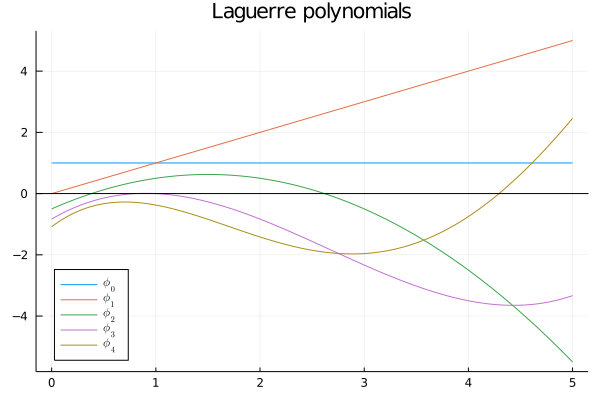

In [2]:
n = 4

xx = range(0, 5, length=1000)

ϕ0, ϕ1 = ones(length(xx)), xx
plot(legend=:bottomleft, title="Laguerre polynomials")
plot!(xx, ϕ0, label=L"\phi_0")
plot!(xx, ϕ1, label=L"\phi_1")

ϕolder, ϕold = ϕ0, ϕ1
for k = 1:n-1
    ϕ = ((2k + 1 .- xx).*ϕold .- k*ϕolder)/(k+1)
    plot!(xx, ϕ, label=latexstring("\\phi_$(k+1)"))
    ϕolder, ϕold = ϕold, ϕ
end
hline!([0], c=:black, label=:none)

---

## Example

Let's use the **Laguerre basis** to find an **exact representation** of the polynomial of degree at most **four** that best fits $f(x) = \cos(x)$ over the interval $[0, \infty)$ with respect to the $w$-norm, where $w(x) = e^{-x}$.

In [3]:
n = 4

x = symbols("x")
w = exp(-x)  # Define the weight function

 -x
ℯ  

In [4]:
ϕ = zeros(Sym, n+1)

ϕ[1] = 1
ϕ[2] = 1 - x
for k = 1:n-1
    ϕ[k+2] = expand(((2k + 1 - x)*ϕ[k+1] - k*ϕ[k])/(k+1))
end

ϕ

5-element Array{Sym,1}:
                                  1
                              1 - x
                    x^2/2 - 2*x + 1
         -x^3/6 + 3*x^2/2 - 3*x + 1
 x^4/24 - 2*x^3/3 + 3*x^2 - 4*x + 1

In [5]:
oo

∞

In [6]:
B = Sym[integrate(w*ϕ[i]*ϕ[j], (x, 0, oo)) for i=1:n+1, j=1:n+1]

5×5 Array{Sym,2}:
 1  0  0  0  0
 0  1  0  0  0
 0  0  1  0  0
 0  0  0  1  0
 0  0  0  0  1

In [7]:
b = Sym[integrate(w*ϕ[i]*cos(x), (x, 0, oo)) for i=1:n+1]

5-element Array{Sym,1}:
  1/2
  1/2
  1/4
    0
 -1/8

In [8]:
c = b
p = expand(dot(c,ϕ))

    4    3    2        
   x    x    x    x   9
- ─── + ── - ── - ─ + ─
  192   12   4    2   8

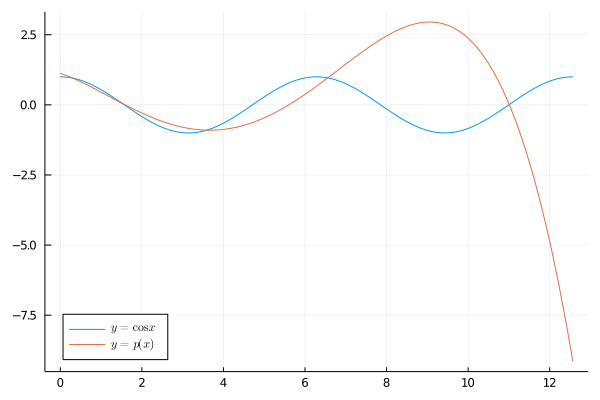

In [9]:
xx = range(0, 4π, length=1000)
yy = Float64[subs(p, x, xi) for xi in xx]

plot(legend=:bottomleft)
plot!(xx, cos.(xx), label=L"y = \cos x")
plot!(xx, yy, label=L"y = p(x)")

---

## Hermite polynomials

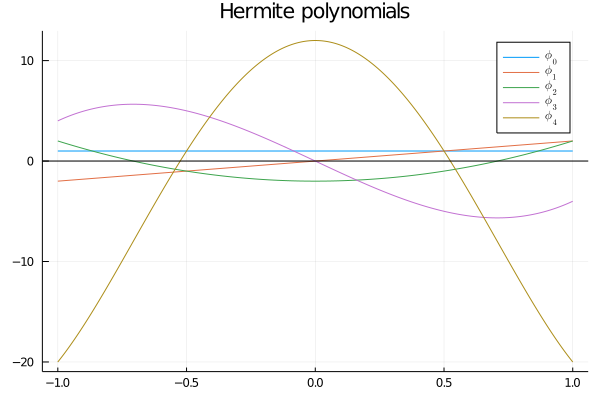

In [10]:
n = 4

xx = range(-1, 1, length=1000)

ϕ0 = ones(length(xx))
ϕ1 = 2xx

plot(legend=:topright, title="Hermite polynomials")
plot!(xx, ϕ0, label=L"\phi_0")
plot!(xx, ϕ1, label=L"\phi_1")

ϕolder, ϕold = ϕ0, ϕ1
for k = 1:n-1
    ϕ = 2xx.*ϕold - 2k*ϕolder
    plot!(xx, ϕ, label=latexstring("\\phi_$(k+1)"))
    ϕolder, ϕold = ϕold, ϕ
end
hline!([0], c=:black, label=:none)

---

## Example

Let's use the **Hermite basis** to find an **exact representation** of the polynomial of degree at most **four** that best fits $f(x) = \cos(x)$ over the interval $(-\infty, \infty)$ with respect to the $w$-norm, where $w(x) = e^{-x^2}$.

In [11]:
n = 4

x = symbols("x")
w = exp(-x^2)  # Define the weight function

   2
 -x 
ℯ   

In [12]:
ϕ = zeros(Sym, n+1)

ϕ[1] = 1
ϕ[2] = 2x
for k = 1:n-1
    ϕ[k+2] = expand(2x*ϕ[k+1] - 2k*ϕ[k])
end

ϕ

5-element Array{Sym,1}:
                    1
                  2⋅x
            4*x^2 - 2
         8*x^3 - 12*x
 16*x^4 - 48*x^2 + 12

In [13]:
B = Sym[integrate(w*ϕ[i]*ϕ[j], (x, -oo, oo)) for i=1:n+1, j=1:n+1]

5×5 Array{Sym,2}:
 √π           0           0            0             0
        0  2⋅√π           0            0             0
        0           0  8⋅√π            0             0
        0           0           0  48⋅√π             0
        0           0           0            0  384⋅√π

The **Hermite polynomials** satisfy

$$\ip{\phi_k}{\phi_k}_w = 2^k k! \sqrt{\pi}, \quad k=0,\ldots,n.$$

(See [Hermite polynomials](http://en.wikipedia.org/wiki/Hermite_polynomials))

In [14]:
d = Float64[2^k*factorial(k)*√PI for k=0:n]

5-element Array{Float64,1}:
   1.772453850905516
   3.544907701811032
  14.179630807244129
  85.07778484346477
 680.6222787477182

In [15]:
b = Float64[
    quadgk(x̄ -> subs(w*ϕ[i]*cos(x), x, x̄), -Inf, 0)[1] +
    quadgk(x̄ -> subs(w*ϕ[i]*cos(x), x, x̄), 0, Inf)[1] 
    for i=1:n+1]

5-element Array{Float64,1}:
  1.3803884470431418
  0.0
 -1.380388447043143
  0.0
  1.3803884470431433

In [16]:
c = b./d

5-element Array{Float64,1}:
  0.7788007830714042
  0.0
 -0.0973500978839256
  0.0
  0.0020281270392484506

In [17]:
p = expand(c ⋅ ϕ)

                    4                      2                    
0.0324500326279752⋅x  - 0.486750489419628⋅x  + 0.997838503310237

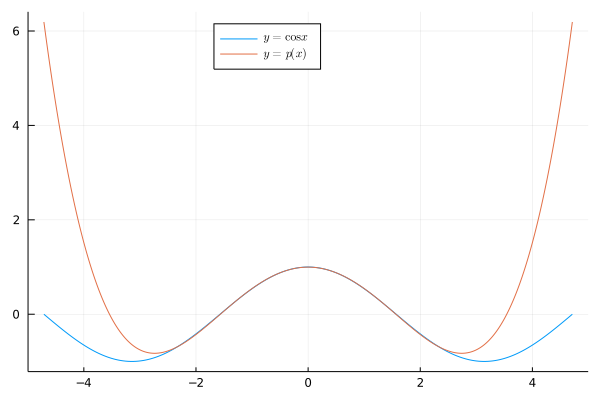

In [18]:
xx = range(-3π/2, 3π/2, length=1000)
yy = Float64[subs(p, x, xi) for xi in xx]

plot(legend=:top)
plot!(xx, cos.(xx), label=L"y = \cos x")
plot!(xx, yy, label=L"y = p(x)")

---

## Chebyshev polynomials

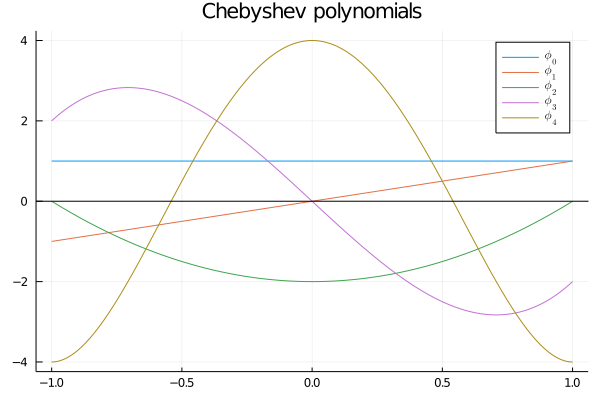

In [28]:
using Plots

n = 4

xx = range(-1, 1, length=1000)

ϕ0 = ones(length(xx))
ϕ1 = xx
plot(legend=:topright, title="Chebyshev polynomials")
plot!(xx, ϕ0, label=L"\phi_0")
plot!(xx, ϕ1, label=L"\phi_1")

ϕolder, ϕold = ϕ0, ϕ1
for k = 1:n-1
    ϕ = 2xx.*ϕold - 2ϕolder
    plot!(xx, ϕ, label=latexstring("\\phi_$(k+1)"))
    ϕolder, ϕold = ϕold, ϕ
end
hline!([0], c=:black, label=:none)

---

## Example

Let's use the **Chebyshev basis** to find an **exact representation** of the polynomial of degree at most **two** that best fits $f(x) = \cos(x)$ over the interval $[-1,1]$ with respect to the $w$-norm, where $w(x) = \frac{1}{\sqrt{1-x^2}}$.

In [32]:
using SymPy

n = 2

x, t = symbols("x, t")
w = 1/√(1-x^2)  # Define the weight function

     1     
───────────
   ________
  ╱      2 
╲╱  1 - x  

In [33]:
ϕ = zeros(Sym, n+1)

ϕ[1] = 1
ϕ[2] = x
for k = 1:n-1
    ϕ[k+2] = expand(2x*ϕ[k+1] - ϕ[k])
end

ϕ

3-element Array{Sym,1}:
         1
         x
 2*x^2 - 1

The **Chebyshev polynomials** satisfy

$$
\begin{align}
\ip{\phi_0}{\phi_0}_w &= \pi,\\
\ip{\phi_k}{\phi_k}_w &= \frac{\pi}{2}, \quad k=1,\ldots,n.
\end{align}$$

In [34]:
d = [PI; PI/2*ones(Sym, n)]

3-element Array{Sym,1}:
   π
 pi/2
 pi/2

Now we need to compute

$$\ip{\phi_k}{\cos}_w = \int_{-1}^1 \frac{\phi_k(x) \cos(x)}{\sqrt{1-x^2}} dx.$$

Let $x = \cos(\theta)$. Then $dx = -\sin(\theta) d\theta$.

Therfore,

$$\ip{\phi_k}{\cos}_w = \int_{0}^\pi \cos(k\theta) \cos(\cos(\theta))\,d\theta.$$


In [35]:
b = Sym[integrate(cos(k*t)*cos(cos(t)), (t, 0, PI)) for k=0:n]

3-element Array{Sym,1}:
          Integral(cos(cos(t)), (t, 0, pi))
   Integral(cos(t)*cos(cos(t)), (t, 0, pi))
 Integral(cos(2*t)*cos(cos(t)), (t, 0, pi))

In [36]:
b = float(b)

3-element Array{Float64,1}:
  2.403939430634413
  1.7859177988785547e-102
 -0.36097994413392404

In [37]:
c = b./float(d)

3-element Array{Float64,1}:
  0.7651976865579665
  1.1369505825892775e-102
 -0.22980696986380095

In [38]:
p = expand(c ⋅ ϕ)

                     2                                              
- 0.459613939727602⋅x  + 1.13695058258928e-102⋅x + 0.995004656421767

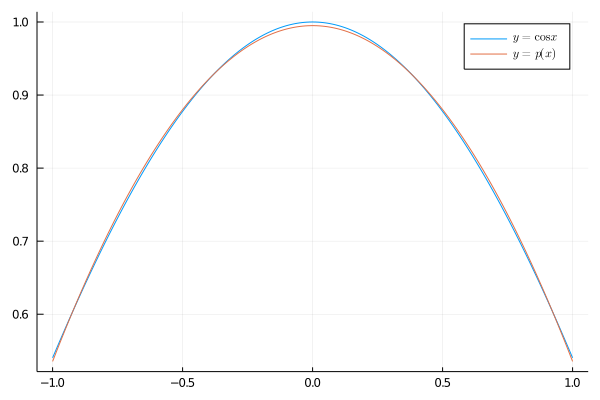

In [40]:
xx = range(-1, 1, length=1000)
yy = Float64[subs(p, x, xi) for xi in xx]

plot(legend=:topright)
plot!(xx, cos.(xx), label=L"y = \cos x")
plot!(xx, yy, label=L"y = p(x)")

---